In [305]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import random
import scipy.stats as st
from scipy import stats
import numpy as np

# Study data files
mouse = pd.read_csv('C:/Users/linab/Downloads/Mouse_metadata.csv')
study = pd.read_csv('C:/Users/linab/Downloads/Study_results.csv')

# Combine the data into a single dataset
result = pd.merge(mouse, study, how = 'left', on =["Mouse ID", "Mouse ID"])

# Display the data table for preview
result

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
# Checking the number of mice.
mousenumber = result["Mouse ID"].count()
mousenumber

1893

In [50]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = result[["Mouse ID", "Timepoint"]]
duplicate

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [51]:
cleanresult = result.drop_duplicates(subset =['Mouse ID'])

In [52]:
clearcount = cleanresult["Mouse ID"].count()
clearcount

249

In [53]:
result.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [54]:
result.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
resulttumor = result[['Drug Regimen', 'Tumor Volume (mm3)']]
Tumormean = resulttumor.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
Tumormedian = result.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
Tumorvar = result.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
Tumorstd = result.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
Tumorsem = result.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

In [59]:
# Assemble the resulting series into a single summary dataframe.
tumorstats = pd.DataFrame({"Mean": Tumormean, 
                            "Median" : Tumormedian,
                            "Variance" : Tumorvar,
                            "Standard Deviation" : Tumorstd,
                            "Standard Error" : Tumorsem

})
tumorstats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


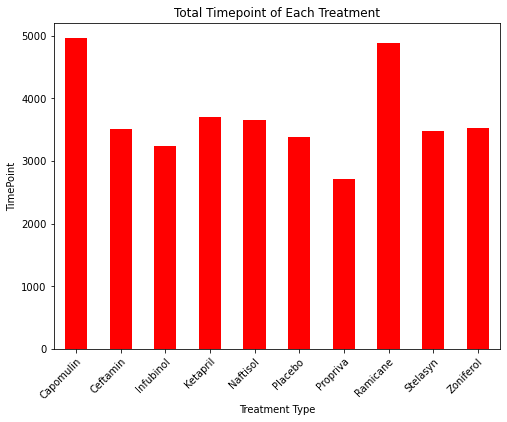

In [78]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
treatmenttime = result.groupby('Drug Regimen')['Timepoint'].sum()
treatmenttimebar = treatmenttime.plot(kind = "bar", facecolor="red", figsize=(8,6),
                                title="Total Timepoint of Each Treatment",
                                xlabel="Treatment Type",
                                ylabel="TimePoint")

# Configure x-tick rotation
xticklabels = treatmenttime.index
treatmenttimebar.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()


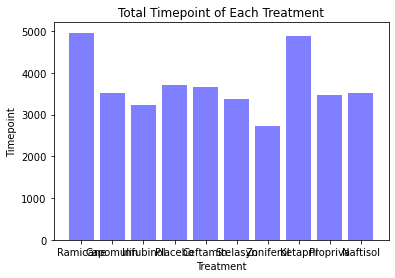

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
treatment = result['Drug Regimen'].unique()
timepointtotal = result.groupby('Drug Regimen').sum()['Timepoint']
xbar = np.arange(len(treatment))
tumorbar = plt.bar(xbar, timepointtotal, color = 'blue', alpha =0.5,align = 'center')
tick_locations = [value for value in xbar]
plt.xticks(tick_locations, treatment)
plt.title("Total Timepoint of Each Treatment")
plt.xlabel("Treatment")
plt.ylabel("Timepoint")
plt.show()

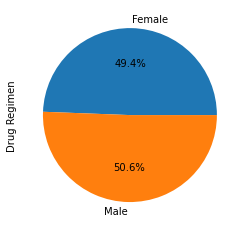

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
micegender = result.groupby('Sex')['Drug Regimen'].count()
micegenderbar = micegender.plot(kind = 'pie',  autopct="%1.1f%%")

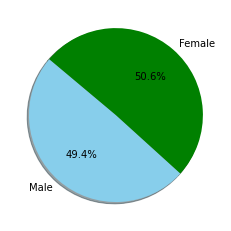

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = result['Sex'].unique()
gendercount = result.groupby('Sex').count()['Drug Regimen']
colors = ['skyblue', 'green']
gendercount = np.array(gendercount)
genderpie = plt.pie(gendercount, labels= gender, colors=colors, shadow=True, autopct="%1.1f%%", startangle=140)

In [162]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
group = result.loc[result['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
groupmicesum = group.groupby(['Drug Regimen','Mouse ID']).sum()["Tumor Volume (mm3)"]
groupmicesum

Drug Regimen  Mouse ID
Capomulin     b128        419.636356
              b742        400.836993
              f966        182.529864
              g288        419.900966
              g316        446.133439
                             ...    
Ramicane      s508        360.501562
              u196        455.763948
              w678         88.166373
              y449        181.439088
              z578        384.115100
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [160]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
group = result.loc[result['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
groupsum = group.groupby('Drug Regimen').sum()["Tumor Volume (mm3)"]
round(groupsum,2)

Drug Regimen
Capomulin    9355.42
Ceftamin     9361.23
Infubinol    9413.49
Ramicane     9169.42
Name: Tumor Volume (mm3), dtype: float64

In [166]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_timepoint = result[['Mouse ID', 'Timepoint','Tumor Volume (mm3)']]
mice_timepointclean = mice_timepoint.drop_duplicates(['Mouse ID'], keep = 'last')
mice_timepointclean

,Mouse ID,Timepoint,Tumor Volume (mm3)
9,k403,45,22.050126
19,s185,45,23.343598
29,x401,45,28.484033
39,m601,45,28.430964
49,g791,45,29.128472
...,...,...,...
1859,z314,5,45.934712
1862,z435,10,48.710661
1872,z581,45,62.754451
1882,z795,45,65.741070


In [167]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


28.061699415000003
73.230500975
78.56701362
22.05012627


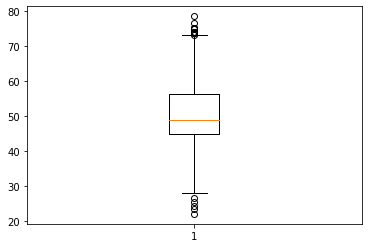

In [174]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile = result['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartile[.25]
upperq = quartile[.75]
iqr = upperq-lowerq
lowerbound = lowerq -(1.5*iqr)
upperbound = upperq +(1.5*iqr)
print(lowerbound)
print(upperbound)
print(result['Tumor Volume (mm3)'].max())
print(result['Tumor Volume (mm3)'].min())
plt.boxplot(result['Tumor Volume (mm3)'])
plt.show()
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [289]:
 # add subset 
 # Determine outliers using upper and lower bounds
subset = result.sample(250)
subquartile = subset['Tumor Volume (mm3)'].quantile([.25,.5,.75])
sublowerq = subquartile[.25]
subupperq = subquartile[.75]
subiqr = subupperq-sublowerq
sublowerbound = sublowerq -(1.5*iqr)
subupperbound = subupperq +(1.5*iqr)
subfilter = subset.loc[(subset['Tumor Volume (mm3)']> subupperbound) | (subset['Tumor Volume (mm3)']<sublowerbound)]
subfilter
#print(subset['Tumor Volume (mm3)'].max())
#print(subset['Tumor Volume (mm3)'].min())
#print(sublowerbound)
#print(subupperbound)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1151,l725,Naftisol,Female,8,26,40,73.693494,3
9,k403,Ramicane,Male,21,16,45,22.050126,1
1571,t724,Naftisol,Female,2,25,45,75.113288,2


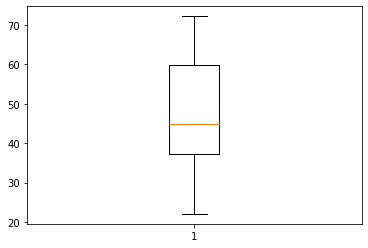

In [195]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fourregimens = result.loc[result['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
mice_regimen_tumorvol = fourregimens[['Mouse ID', 'Drug Regimen', 'Timepoint','Tumor Volume (mm3)']]
mice_regimen_tumorvol = mice_regimen_tumorvol.drop_duplicates(['Mouse ID'], keep = 'last')
mice_regimen_tumorvol
plt.boxplot(mice_regimen_tumorvol['Tumor Volume (mm3)'])
plt.show()

In [197]:
mice_regimen_tumorvol['Tumor Volume (mm3)'].describe()

count    100.000000
mean      47.197795
std       12.953884
min       22.050126
25%       37.187744
50%       45.000000
75%       59.930262
max       72.226731
Name: Tumor Volume (mm3), dtype: float64

In [254]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = result.loc[result['Drug Regimen'] == "Capomulin"]
capomulinmouse = random.choice(capomulin['Mouse ID'])
line = capomulin[['Mouse ID' = capomulinmouse, 'Timepoint', 'Tumor Volume (mm3)']]
#xbar = np.array(len(capomulin['Timepoint'].unique()))
#y = capomulinmouse['Tumor Volume (mm3)']
#plt.plot(y, xbar)

SyntaxError: invalid syntax (Temp/ipykernel_38848/1011317006.py, line 4)

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

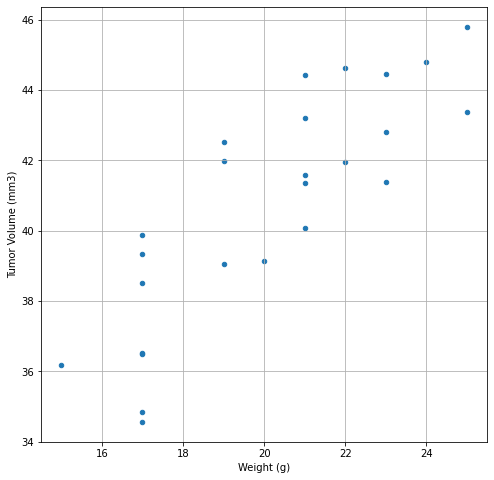

In [267]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen#
capomulin
capgroup = capomulin.groupby('Mouse ID').mean()[{'Tumor Volume (mm3)','Weight (g)'}]
capgroup.plot(kind = 'scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize =(8,8))

In [269]:
capgroup

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


In [271]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
volume = capgroup.iloc[:,0]
weight = capgroup.iloc[:,1]
correlation = st.pearsonr(volume,weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


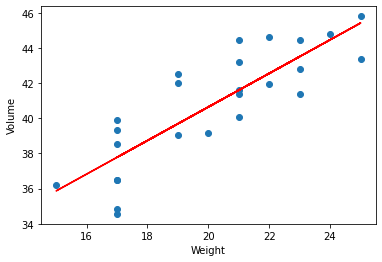

In [290]:
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(weight, volume)
regress = weight * m_slope + m_int
eq= "y =" + str(round(m_slope,2)) + "x +" + str(round(m_int,2))
plt.scatter(weight,volume)
plt.plot(weight,regress,"r-")
plt.annotate(eq,(0,50),fontsize=9,color="red")
plt.xlabel('Weight')
plt.ylabel('Volume')
plt.show()

In [297]:
stats.normaltest(result['Tumor Volume (mm3)'])

NormaltestResult(statistic=27.35320847774101, pvalue=1.1490164540588077e-06)

In [304]:
hey = result['Drug Regimen'].value_counts()
hey

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Tumor Volume (mm3)')

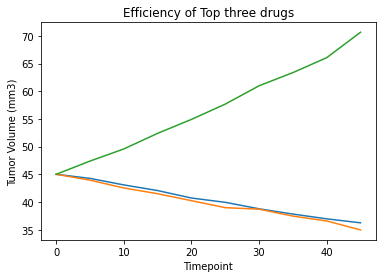

In [318]:
capomulinwork = capomulin.groupby('Timepoint').mean()['Tumor Volume (mm3)']
ramicane = result.loc[result['Drug Regimen'] == "Ramicane"]
ramicanework = ramicane.groupby('Timepoint').mean()['Tumor Volume (mm3)']
ketapril = result.loc[result['Drug Regimen'] == "Ketapril"]
ketaprilwork = ketapril.groupby('Timepoint').mean()['Tumor Volume (mm3)']
Topdrugperform = pd.DataFrame({"Capomulin Performance": capomulinwork, 
                                "Ramicane Performance" :ramicanework,
                                "Ketapril Performance" : ketaprilwork

})
Topdrugperform
plt.plot(Topdrugperform)
plt.title("Efficiency of Top three drugs")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [315]:
Topdrugperform

,Capomulin Performance,Ramicane Performance,Ketapril Performance
Timepoint,,,
0,45.000000,45.000000,45.000000
5,44.266086,43.944859,47.389175
10,43.084291,42.531957,49.582269
15,42.064317,41.495061,52.399974
20,40.716325,40.238325,54.920935
25,39.939528,38.974300,57.678982
30,38.769339,38.703137,60.994507
35,37.816839,37.451996,63.371686
40,36.958001,36.574081,66.068580
